<a href="https://colab.research.google.com/github/MohitGupta2021/form/blob/master/face_mask_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense,Flatten,BatchNormalization,Conv2D,MaxPool2D,Dropout
from tensorflow.keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from google.colab import files



In [5]:
upload=files.upload()


Saving data.zip to data.zip
Saving test-70x70.zip to test-70x70.zip


In [6]:
!unzip data.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/without/01002_Mask_Mouth_Chin.jpg  
  inflating: data/without/01003_Mask_Mouth_Chin.jpg  
  inflating: data/without/01004_Mask_Mouth_Chin.jpg  
  inflating: data/without/01005_Mask_Mouth_Chin.jpg  
  inflating: data/without/01006_Mask_Mouth_Chin.jpg  
  inflating: data/without/01007_Mask_Mouth_Chin.jpg  
  inflating: data/without/01008_Mask_Mouth_Chin.jpg  
  inflating: data/without/01009_Mask_Mouth_Chin.jpg  
  inflating: data/without/01010_Mask_Mouth_Chin.jpg  
  inflating: data/without/01011_Mask_Mouth_Chin.jpg  
  inflating: data/without/01012_Mask_Mouth_Chin.jpg  
  inflating: data/without/01013_Mask_Mouth_Chin.jpg  
  inflating: data/without/01014_Mask_Mouth_Chin.jpg  
  inflating: data/without/01015_Mask_Chin.jpg  
  inflating: data/without/01016_Mask_Mouth_Chin.jpg  
  inflating: data/without/01017_Mask_Mouth_Chin.jpg  
  inflating: data/without/01018_Mask_Mouth_Chin.jpg  
  inflating: data/without/01019_Mask_

In [7]:
!rm data.zip

In [10]:
batch_size=8
epochs=30


In [9]:
directory='data'

In [11]:
train_datagen=ImageDataGenerator(validation_split=0.3,rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')

In [13]:
train_generator = train_datagen.flow_from_directory(
                                directory,
                                target_size = (70, 70),
                                batch_size = batch_size,
                                color_mode="rgb",               # for coloured images
                                class_mode = 'binary',
                                seed=2020,                      # to make the result reproducible
                                subset = 'training')            # Specify this is training set


Found 7010 images belonging to 2 classes.


In [14]:
validation_generator = train_datagen.flow_from_directory(
                                directory,
                                target_size = (70, 70),
                                batch_size = batch_size,
                                color_mode="rgb",               # for coloured images
                                class_mode = 'binary',
                                seed=2020,                      # to make the result reproducible
                                subset = 'validation')  

Found 3003 images belonging to 2 classes.


In [15]:
imgs,labels=next(train_generator)

In [18]:
def plotImages(images_arr):
  fig,axes=plt.subplots(1,batch_size,figsize=(20,20))
  axes=axes.flatten()
  for img,ax in zip(images_arr,axes):
    ax.imshow(img)
    ax.axis('off')
    plt.tight_layout()
    plt.show()


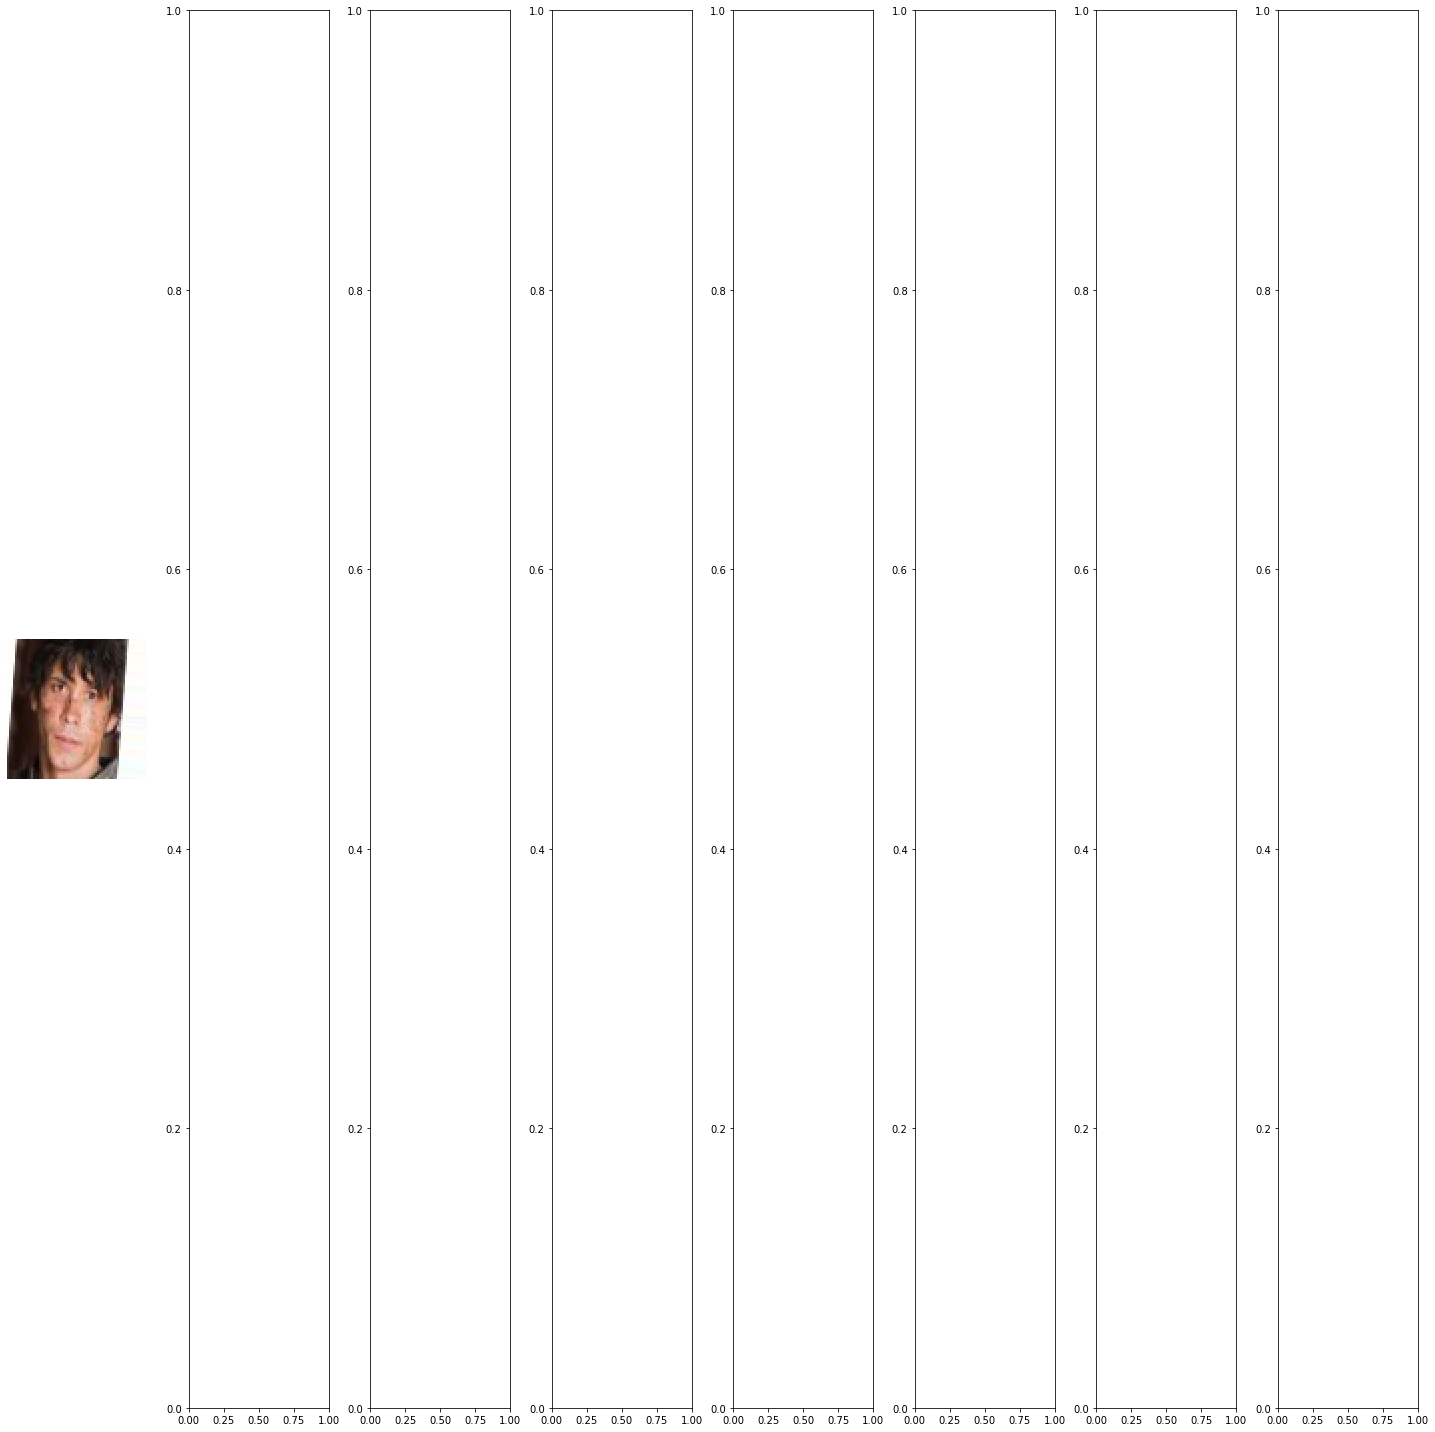

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [19]:
plotImages(imgs)

In [20]:
labels

array([1., 0., 0., 1., 1., 0., 1., 0.], dtype=float32)

In [26]:
model=Sequential([
                 Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same',input_shape=(70,70,3)),
                 MaxPool2D(pool_size=(2,2),strides=2),
                 Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same',input_shape=(70,70,3)),
                 MaxPool2D(pool_size=(2,2),strides=2),
                 Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same',input_shape=(70,70,3)),
                 MaxPool2D(pool_size=(2,2),strides=2),
                 Flatten(),
                 Dense(units=64,activation='relu'),
                 Dense(units=1,activation='sigmoid'),])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 70, 70, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 35, 35, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 35, 35, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 17, 17, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 17, 17, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 64)         0

In [28]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [29]:
history=model.fit(train_generator,epochs=epochs,validation_data=validation_generator)

Epoch 1/30
877/877 [==============================] - 75s 84ms/step - loss: 0.4162 - accuracy: 0.8067 - val_loss: 0.4288 - val_accuracy: 0.7995
Epoch 2/30
877/877 [==============================] - 74s 85ms/step - loss: 0.2874 - accuracy: 0.8785 - val_loss: 0.3333 - val_accuracy: 0.8638
Epoch 3/30
877/877 [==============================] - 74s 85ms/step - loss: 0.2392 - accuracy: 0.9056 - val_loss: 0.3259 - val_accuracy: 0.8648
Epoch 4/30
877/877 [==============================] - 75s 85ms/step - loss: 0.2028 - accuracy: 0.9234 - val_loss: 0.3633 - val_accuracy: 0.8492
Epoch 5/30
877/877 [==============================] - 74s 85ms/step - loss: 0.1931 - accuracy: 0.9291 - val_loss: 0.2264 - val_accuracy: 0.9151
Epoch 6/30
877/877 [==============================] - 75s 85ms/step - loss: 0.1697 - accuracy: 0.9345 - val_loss: 0.2337 - val_accuracy: 0.9074
Epoch 7/30
877/877 [==============================] - 74s 85ms/step - loss: 0.1574 - accuracy: 0.9417 - val_loss: 0.2089 - val_accuracy:

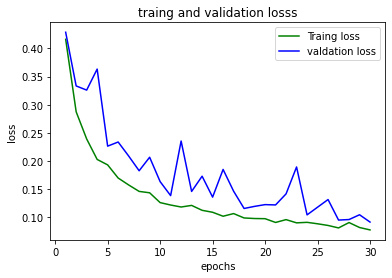

In [30]:
loss_train=history.history['loss']
loss_val=history.history['val_loss']
epochsplot=range(1,epochs+1)
plt.plot(epochsplot,loss_train,'g',label='Traing loss')
plt.plot(epochsplot,loss_val,'b',label='valdation loss')
plt.title('traing and validation losss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

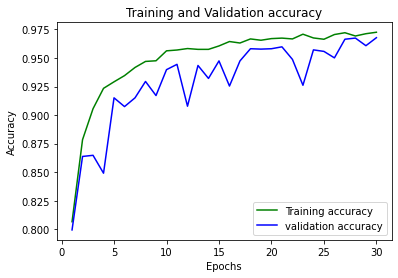

In [32]:
accur_train = history.history['accuracy']
accur_val = history.history['val_accuracy']
plt.plot(epochsplot, accur_train, 'g', label='Training accuracy')
plt.plot(epochsplot, accur_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

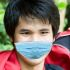



The person is not wearing a mask.



In [38]:
from IPython.display import Image, display
TGREEN =  '\033[1;37;42m'
TRED =    '\033[1;37;41m'

img_directory ='/content/data/without/01344_Mask_Nose_Mouth.jpg'
img_pred = image.load_img(img_directory, target_size = (70, 70))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis = 0)

prediction = model.predict(img_pred)
display(Image(img_directory,width= 150, height=150))
print("\n")
if(int(prediction[0][0]) == 0):
  print(TGREEN + "The person is wearing a mask. \n")
else:
  print(TRED + "The person is not wearing a mask.\n")